<h1>Project 11</h1>

<h2>Automobile Insurance Dataset</h2>

<img src="https://cdn.pixabay.com/photo/2016/03/29/08/48/project-1287781_1280.jpg">


Aim:

1.Need to predict claim amount based on the input features in **claim** dataset
    
2.Need to predict fruad(Yes/No) based on the input features in **fraud** dataset

***First importing necessary packages***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

***Importing data which is in csv format***

In [2]:
claim=pd.read_csv('Auto_Insurance_Claims_amount.csv')
fraud=pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
claim.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [4]:
fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Checking the number of rows and columns

In [5]:
claim.shape

(9134, 26)

In [6]:
fraud.shape

(1000, 40)

Replacing ? with Nan so that we can find its number

In [7]:
claim.replace({'?': np.nan}, regex=False,inplace=True)
fraud.replace({'?': np.nan}, regex=False,inplace=True)


Checking data type and null count

In [8]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [9]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

We see that there are no missing values in claim dataset but we do have them in fraud dataset

In [10]:
fraud['police_report_available'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [11]:
fraud['collision_type'].unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [12]:
fraud['property_damage'].unique()

array(['YES', nan, 'NO'], dtype=object)

The column _c39 has all nan values, hence we will drop this column

As the these features are categorical in nature, lets replace them with the most frequent values

AxesSubplot(0.125,0.125;0.775x0.755)


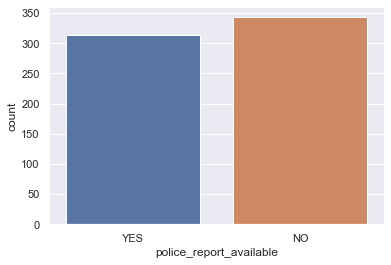

AxesSubplot(0.125,0.125;0.775x0.755)


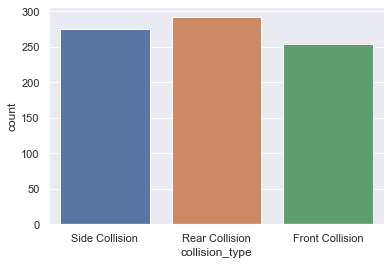

AxesSubplot(0.125,0.125;0.775x0.755)


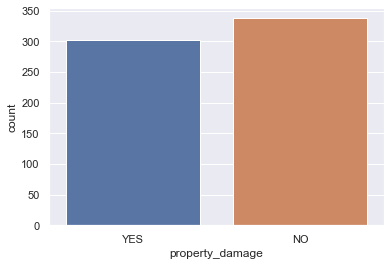

In [13]:
col=['police_report_available','collision_type','property_damage']
    
for i in range(0,3):
    print(sns.countplot(fraud[col[i]]))
    plt.show()

 1.For column police_report_available as NO is most frequent, we will replace missing values with 'NO'.
 
 2.For column collision_type as Rear Collision is most frequest, we will replace missing values with 'Rear Collision'.
 
 3.For column property_damage as No is most frequent, we will replace missing values with 'NO'.

In [14]:
fraud['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [15]:
fraud['police_report_available'].value_counts().idxmax()

'NO'

In [16]:
fraud['police_report_available'].replace(np.nan, "NO", inplace=True)

In [17]:
fraud['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [18]:
fraud['collision_type'].value_counts().idxmax()

'Rear Collision'

In [19]:
fraud['collision_type'].replace(np.nan, "Rear Collision", inplace=True)

In [20]:
fraud['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [21]:
fraud['property_damage'].value_counts().idxmax()

'NO'

In [22]:
fraud['property_damage'].replace(np.nan, "NO", inplace=True)

In [23]:
fraud.drop("_c39", axis = 1, inplace=True)

In [24]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [25]:
claim.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

Checking all the unique columns and dropping the columns that's not useful

In [26]:
claim.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

AxesSubplot(0.125,0.125;0.775x0.755)


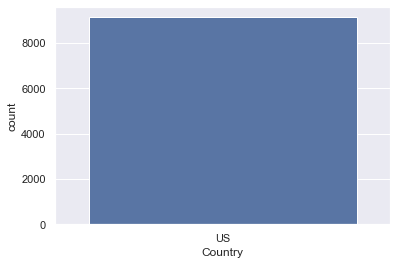

AxesSubplot(0.125,0.125;0.775x0.755)


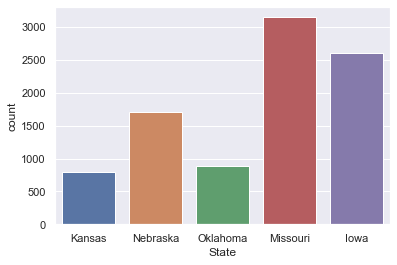

AxesSubplot(0.125,0.125;0.775x0.755)


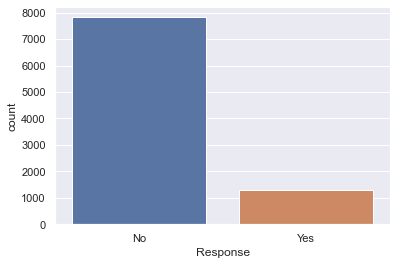

AxesSubplot(0.125,0.125;0.775x0.755)


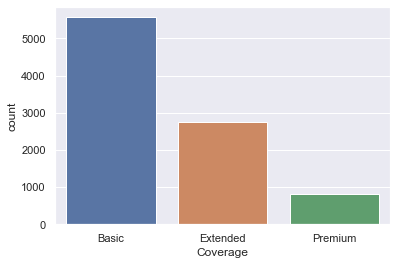

AxesSubplot(0.125,0.125;0.775x0.755)


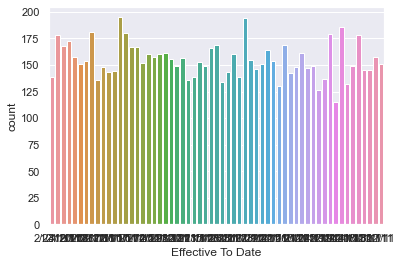

AxesSubplot(0.125,0.125;0.775x0.755)


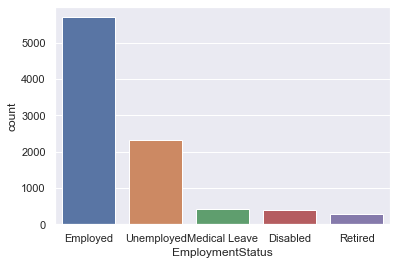

AxesSubplot(0.125,0.125;0.775x0.755)


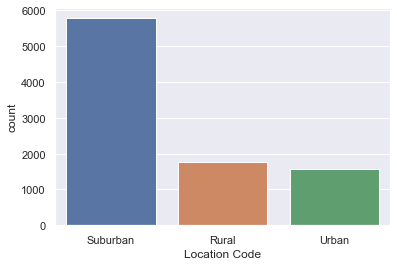

AxesSubplot(0.125,0.125;0.775x0.755)


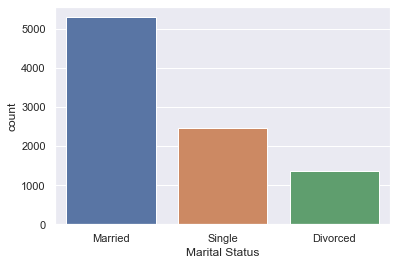

AxesSubplot(0.125,0.125;0.775x0.755)


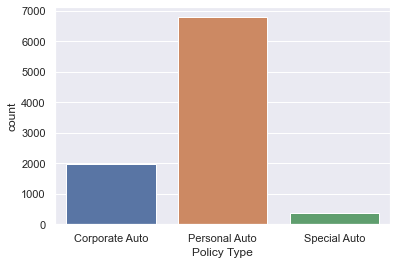

AxesSubplot(0.125,0.125;0.775x0.755)


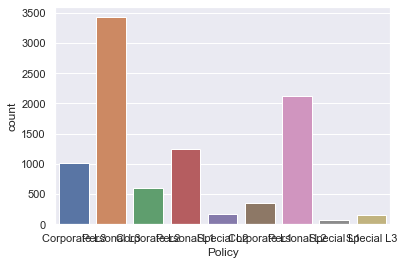

AxesSubplot(0.125,0.125;0.775x0.755)


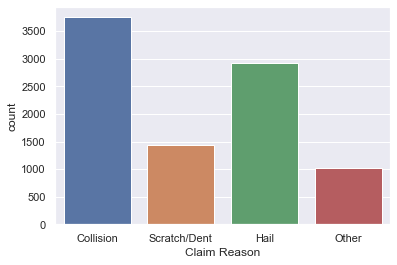

AxesSubplot(0.125,0.125;0.775x0.755)


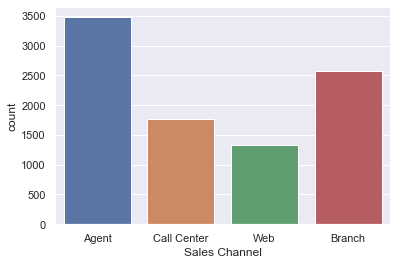

AxesSubplot(0.125,0.125;0.775x0.755)


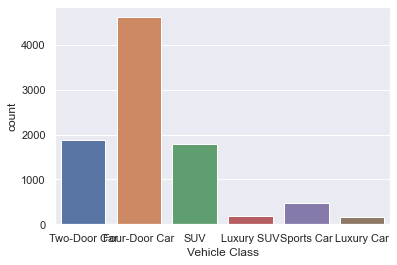

AxesSubplot(0.125,0.125;0.775x0.755)


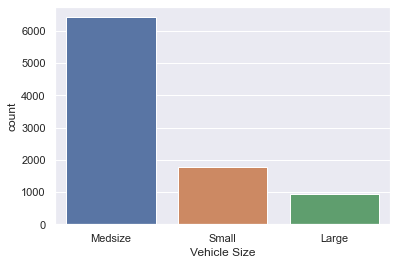

In [27]:
col=['Country','State','Response','Coverage','Effective To Date','EmploymentStatus','Location Code','Marital Status','Policy Type','Policy','Claim Reason','Sales Channel','Vehicle Class','Vehicle Size']
    
for i in range(0,14):
    print(sns.countplot(claim[col[i]]))
    plt.show()

Since the country in the given set is only US we will drop the column and date as well as we don't have enough information on that to analyse

AxesSubplot(0.125,0.125;0.775x0.755)


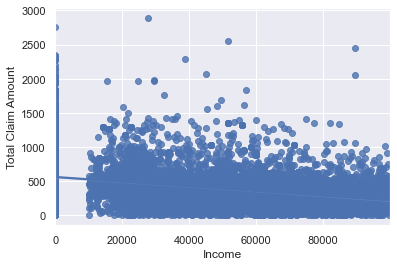

AxesSubplot(0.125,0.125;0.775x0.755)


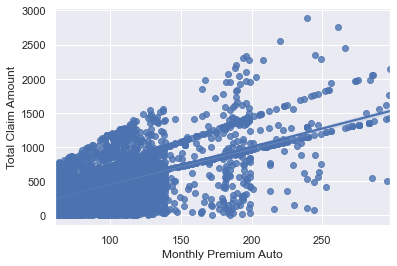

AxesSubplot(0.125,0.125;0.775x0.755)


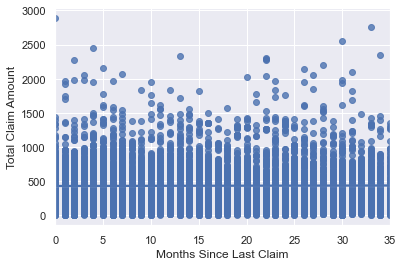

AxesSubplot(0.125,0.125;0.775x0.755)


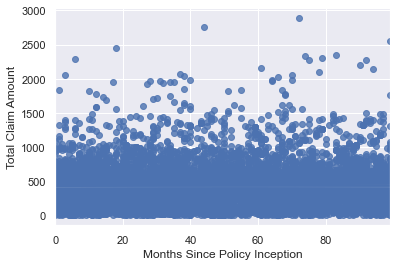

AxesSubplot(0.125,0.125;0.775x0.755)


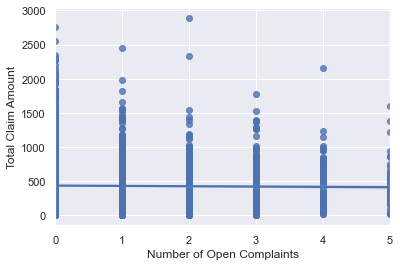

AxesSubplot(0.125,0.125;0.775x0.755)


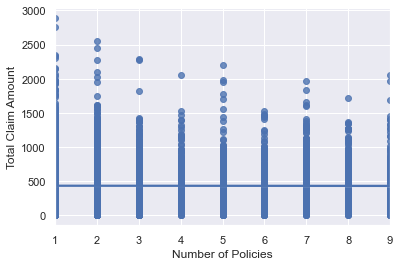

AxesSubplot(0.125,0.125;0.775x0.755)


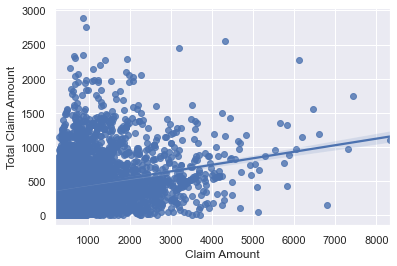

In [28]:
cold=['Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints','Number of Policies','Claim Amount']
    
for i in range(0,7):
    print(sns.regplot(x=cold[i],y="Total Claim Amount",data=claim))
    plt.show()

Dropping unnecessary columns

In [29]:
claim=claim.drop(['Customer','Country','Effective To Date'],axis=1)

Lets separate all our categorical features so that we can convert them

In [30]:
claim.head()

,State Code,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,KS,Kansas,276.351928,No,Basic,Bachelor,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,NE,Nebraska,697.953590,No,Extended,Bachelor,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,OK,Oklahoma,1288.743165,No,Premium,Bachelor,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,MO,Missouri,764.586183,No,Basic,Bachelor,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,KS,Kansas,281.369258,No,Basic,Bachelor,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [31]:
claim_obj = claim.select_dtypes(include=['object']).copy()
claim_obj.head()

,State Code,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
0,KS,Kansas,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Collision,Agent,Two-Door Car,Medsize
1,NE,Nebraska,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Scratch/Dent,Agent,Four-Door Car,Medsize
2,OK,Oklahoma,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Collision,Agent,Two-Door Car,Medsize
3,MO,Missouri,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Collision,Call Center,SUV,Medsize
4,KS,Kansas,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Collision,Agent,Four-Door Car,Medsize


In [32]:
x1=pd.get_dummies(claim_obj)
x1.head()

,State Code_IA,State Code_KS,State Code_MO,State Code_NE,State Code_OK,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,State_Oklahoma,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [33]:
claim.drop(claim_obj,axis=1,inplace=True)
claim.head()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,276.351928,56274,69,32,5,0,1,384.811147
1,697.953590,0,94,13,42,0,8,1131.464935
2,1288.743165,48767,108,18,38,0,2,566.472247
3,764.586183,0,106,18,65,0,7,529.881344
4,281.369258,43836,73,12,44,0,1,138.130879


In [34]:
claim=pd.concat([claim,x1], axis=1)
claim.head()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State Code_IA,State Code_KS,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,276.351928,56274,69,32,5,0,1,384.811147,0,1,...,0,0,0,0,0,0,1,0,1,0
1,697.953590,0,94,13,42,0,8,1131.464935,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1288.743165,48767,108,18,38,0,2,566.472247,0,0,...,0,0,0,0,0,0,1,0,1,0
3,764.586183,0,106,18,65,0,7,529.881344,0,0,...,0,0,0,0,1,0,0,0,1,0
4,281.369258,43836,73,12,44,0,1,138.130879,0,1,...,0,1,0,0,0,0,0,0,1,0


Now, we will remove these outliers using below code

In [35]:
from scipy.stats import zscore
z = np.abs(zscore(claim))
print('The shape of the dataset before removing outliers is',claim.shape)
df_z = claim[(z < 3).all(axis=1)]
print('The shape of the dataset after removing outliers is',df_z.shape)
claim=df_z

The shape of the dataset before removing outliers is (9134, 70)
The shape of the dataset after removing outliers is (3892, 70)


In [36]:
#reset index, because we droped few rows
claim.reset_index(drop=True, inplace=True)

Calculating correlation

In [37]:
claim.corr()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State Code_IA,State Code_KS,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
Claim Amount,1.000000,0.024403,0.246641,0.041062,-0.012447,-0.004344,0.051371,0.068133,0.021507,NaN,...,-0.011648,-0.113739,NaN,NaN,0.205846,NaN,-0.063279,-0.008851,0.010892,-0.005853
Income,0.024403,1.000000,-0.020394,-0.036452,0.010220,0.010259,-0.011642,-0.427677,0.016650,NaN,...,0.025824,-0.001619,NaN,NaN,-0.008018,NaN,0.009551,-0.024206,0.025853,-0.011461
Monthly Premium Auto,0.246641,-0.020394,1.000000,-0.003558,-0.017495,-0.018887,0.002770,0.437764,-0.000379,NaN,...,-0.017331,-0.482878,NaN,NaN,0.844183,NaN,-0.240266,-0.015154,0.040735,-0.035535
Months Since Last Claim,0.041062,-0.036452,-0.003558,1.000000,-0.056481,0.038692,0.000036,0.003829,-0.018713,NaN,...,-0.008965,0.005785,NaN,NaN,-0.007900,NaN,0.000766,-0.002178,0.005141,-0.004283
Months Since Policy Inception,-0.012447,0.010220,-0.017495,-0.056481,1.000000,-0.037989,-0.003231,-0.038030,0.022664,NaN,...,-0.006304,-0.002505,NaN,NaN,-0.022320,NaN,0.024241,-0.010095,0.013070,-0.007423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vehicle Class_Sports Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle Class_Two-Door Car,-0.063279,0.009551,-0.240266,0.000766,0.024241,0.006353,-0.011304,-0.102295,0.026447,NaN,...,0.005586,-0.623527,NaN,NaN,-0.282462,NaN,1.000000,0.042320,-0.045851,0.020790
Vehicle Size_Large,-0.008851,-0.024206,-0.015154,-0.002178,-0.010095,0.011228,-0.020132,-0.034150,-0.010384,NaN,...,-0.013157,0.000704,NaN,NaN,-0.045196,NaN,0.042320,1.000000,-0.519526,-0.160175
Vehicle Size_Medsize,0.010892,0.025853,0.040735,0.005141,0.013070,-0.005594,0.007049,-0.081330,-0.021314,NaN,...,0.030861,-0.006195,NaN,NaN,0.055632,NaN,-0.045851,-0.519526,1.000000,-0.760207


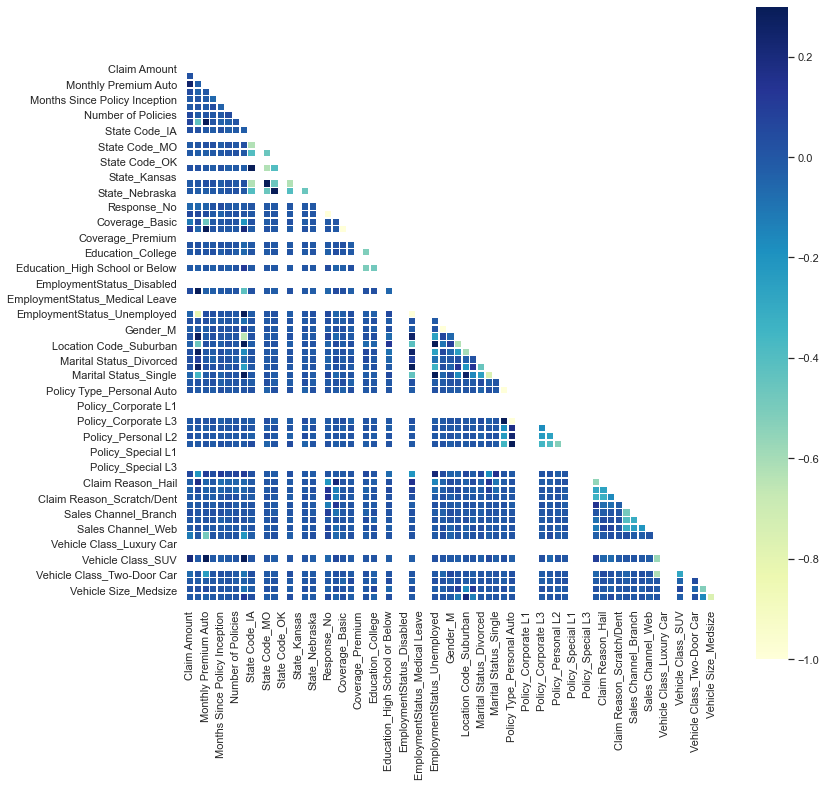

In [38]:
corr = claim.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=0.5,cmap="YlGnBu")

Separating our input and output features

In [39]:
y_claim=claim['Total Claim Amount']
y_claim.head()

0    1131.464935
1     159.383042
2     321.600000
3     482.400000
4     528.000000
Name: Total Claim Amount, dtype: float64

In [40]:
x_claim=claim.drop(['Total Claim Amount'],axis=1)
x_claim.head()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State Code_IA,State Code_KS,State Code_MO,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,697.953590,0,94,13,42,0,8,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,825.629780,62902,69,14,94,0,2,1,0,0,...,1,0,0,0,0,0,1,0,1,0
2,538.089864,55350,67,0,13,0,9,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,473.899202,0,67,23,5,0,3,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,819.719708,0,110,27,87,0,3,0,0,1,...,0,0,0,0,1,0,0,0,1,0


We have both input and output features ready for claim dataset lets get out fraud dataset ready

In [41]:
fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [42]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [43]:
fraud_obj = fraud.select_dtypes(include=['object']).copy()
fraud_obj.head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NO,NO,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,NO,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N


In [44]:
fraud_obj.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

AxesSubplot(0.125,0.125;0.775x0.755)


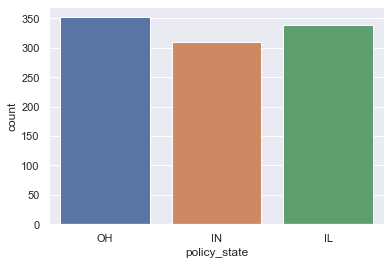

AxesSubplot(0.125,0.125;0.775x0.755)


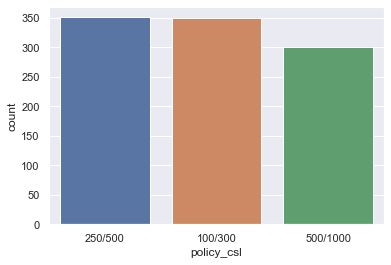

AxesSubplot(0.125,0.125;0.775x0.755)


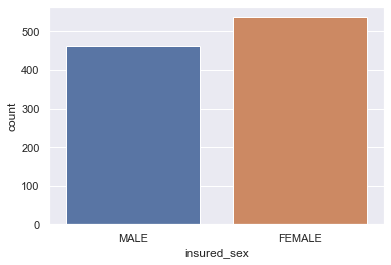

AxesSubplot(0.125,0.125;0.775x0.755)


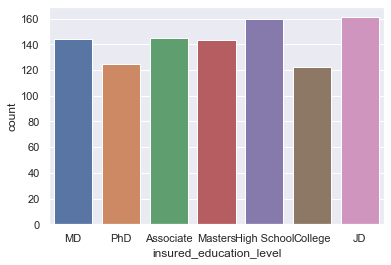

AxesSubplot(0.125,0.125;0.775x0.755)


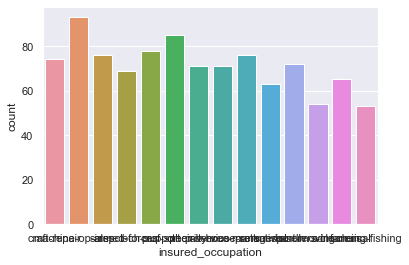

AxesSubplot(0.125,0.125;0.775x0.755)


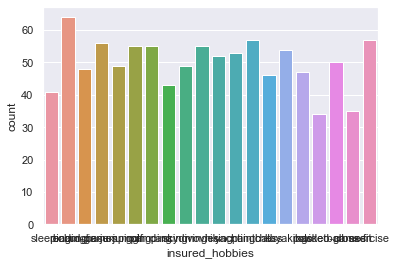

AxesSubplot(0.125,0.125;0.775x0.755)


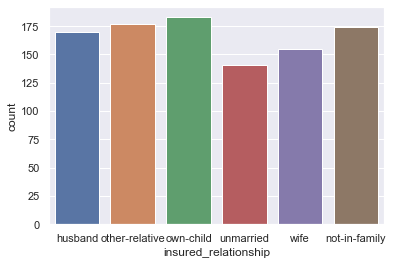

AxesSubplot(0.125,0.125;0.775x0.755)


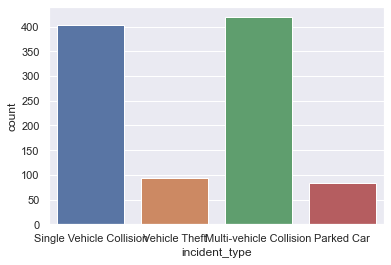

AxesSubplot(0.125,0.125;0.775x0.755)


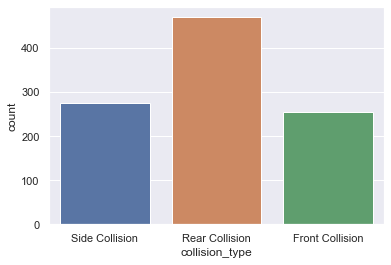

AxesSubplot(0.125,0.125;0.775x0.755)


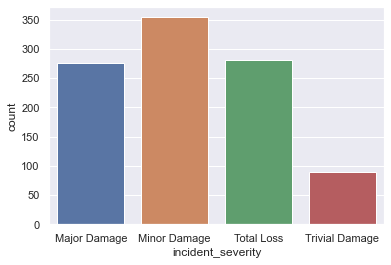

AxesSubplot(0.125,0.125;0.775x0.755)


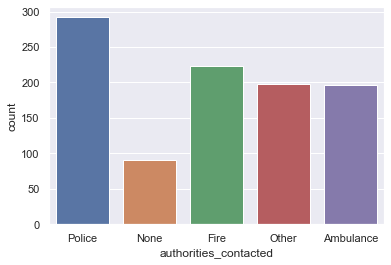

AxesSubplot(0.125,0.125;0.775x0.755)


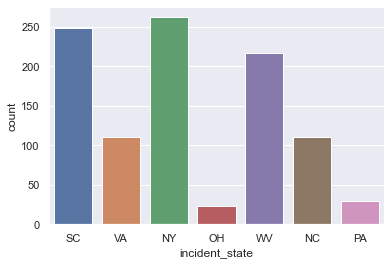

AxesSubplot(0.125,0.125;0.775x0.755)


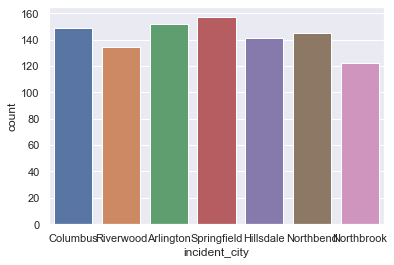

AxesSubplot(0.125,0.125;0.775x0.755)


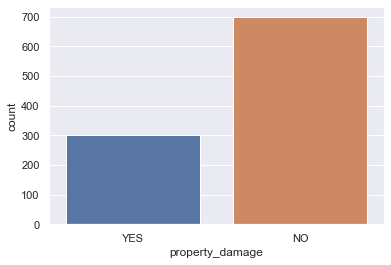

AxesSubplot(0.125,0.125;0.775x0.755)


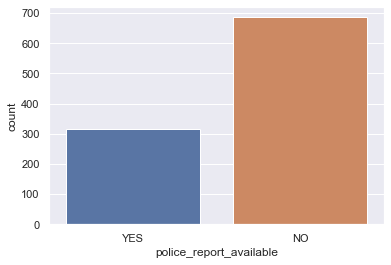

AxesSubplot(0.125,0.125;0.775x0.755)


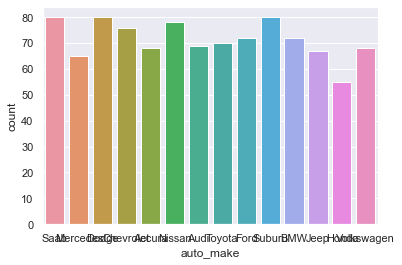

AxesSubplot(0.125,0.125;0.775x0.755)


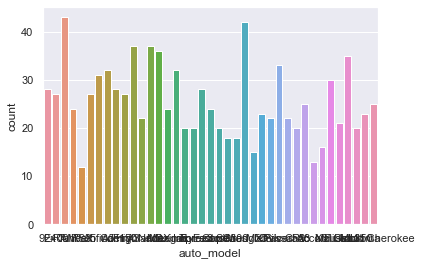

AxesSubplot(0.125,0.125;0.775x0.755)


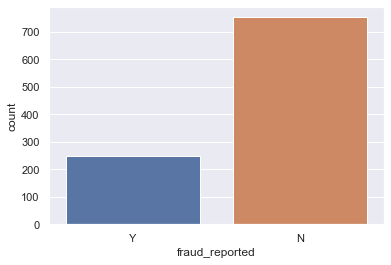

In [45]:
col=['policy_state', 'policy_csl', 'insured_sex','insured_education_level', 'insured_occupation', 'insured_hobbies','insured_relationship', 'incident_type','collision_type', 'incident_severity', 'authorities_contacted','incident_state', 'incident_city','property_damage', 'police_report_available', 'auto_make', 'auto_model','fraud_reported']
for i in range(0,18):
    print(sns.countplot(fraud[col[i]]))
    plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()
le.fit(fraud['fraud_reported'])
y1=le.transform(fraud['fraud_reported'])
y1

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [47]:
y_fraud=pd.DataFrame(y1,columns =["fraud_reported"])
y_fraud.head()

,fraud_reported
0,1
1,1
2,0
3,1
4,0


In [48]:
fraud.drop(fraud_obj,axis=1,inplace=True)
fraud.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009


In [49]:
fraud_obj=fraud_obj.drop(['policy_bind_date','incident_date','incident_location','fraud_reported'],axis=1)

In [50]:
fraud_obj.head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,NO,NO,Mercedes,E400
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,NO,NO,Chevrolet,Tahoe
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX


In [51]:
x2=pd.get_dummies(fraud_obj)
x2.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
x_fraud=pd.concat([fraud,x2], axis=1)
x_fraud.drop(['policy_number'],axis=1,inplace=True)
x_fraud.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,1000,1406.91,0,466132,53300,0,5,1,...,0,0,0,0,0,0,0,0,0,0
1,228,42,2000,1197.22,5000000,468176,0,0,8,1,...,0,0,0,0,0,0,0,0,0,0
2,134,29,2000,1413.14,5000000,430632,35100,0,7,3,...,0,1,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,608117,48900,-62400,5,1,...,0,0,0,0,0,1,0,0,0,0
4,228,44,1000,1583.91,6000000,610706,66000,-46000,20,1,...,0,0,1,0,0,0,0,0,0,0


In [53]:
y_fraud.head()

,fraud_reported
0,1
1,1
2,0
3,1
4,0


We have both of input and output attributes cleaned and in desired format

<h2>End of EDA Process</h2>

Lets start Building models to make predictions and find the model that works best on our dataset

Separating our input and output features

<h2>Start of Machine Learning Process</h2>

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [55]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x_claim,y_claim,test_size=0.2,random_state=50)

In [56]:
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
DTR=DecisionTreeRegressor(random_state=3)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=3)
RFR=RandomForestRegressor(random_state=3)
GBR=GradientBoostingRegressor(random_state=3)

In [57]:
models=[]
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [58]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2*100)
    R2_score.append(r2*100)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    score= abs(cross_val_score(model,x_claim,y_claim,cv=10,scoring='r2')).mean()
    print('Cross_Val_Score = ',score*100)
    cvs.append(score*100)
    print('\n')

*-----------------------------* Lasso *------------------------------*
Lasso()
R2_score =  74.04886772153662
Mean_Squared_Error = 11038.57373003081
Cross_Val_Score =  75.1079740051173


*-----------------------------* Ridge *------------------------------*
Ridge()
R2_score =  74.1228754783144
Mean_Squared_Error = 11007.093790311046
Cross_Val_Score =  75.12917117442484


*-----------------------------* ElasticNet *------------------------------*
ElasticNet()
R2_score =  56.907870013048644
Mean_Squared_Error = 18329.66858404838
Cross_Val_Score =  59.754594262042374


*-----------------------------* DecisionTreeRegressor *------------------------------*
DecisionTreeRegressor(random_state=3)
R2_score =  60.35382452581063
Mean_Squared_Error = 16863.897358681723
Cross_Val_Score =  61.39318585775071


*-----------------------------* KNeighborsRegressor *------------------------------*
KNeighborsRegressor()
R2_score =  12.988308213961597
Mean_Squared_Error = 37011.29356702479
Cross_Val_Score =

In [59]:
result = pd.DataFrame({'Regression Model': Model, 'R2 Score': R2_score ,'Mean Squared Error' :MSE,'Cross Validation score':cvs})
result

,Regression Model,R2 Score,Mean Squared Error,Cross Validation score
0,Lasso,74.048868,11038.573730,75.107974
1,Ridge,74.122875,11007.093790,75.129171
2,ElasticNet,56.907870,18329.668584,59.754594
3,DecisionTreeRegressor,60.353825,16863.897359,61.393186
4,KNeighborsRegressor,12.988308,37011.293567,19.469881
5,AdaBoostRegressor,70.232967,12661.705252,69.815434
6,RandomForestRegressor,79.551789,8697.851133,80.705232
7,GradientBoostingRegressor,78.947704,8954.804681,80.476187


We will choose RandomForestRegressor as it is giving good accuracy with best Cross Validation score compared to all other models

<h2>Lets predict fraud</h2>

Since out target variable is Bivariant, we are going to do classification analysis

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x_fraud,y_fraud,test_size=0.2,random_state=42)

In [62]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [63]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))

*-----------------------------* KNeighborsClassifier *------------------------------*


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  74.0


Cross_Val_Score =  0.7369999999999999


roc_auc_score =  0.5329153605015674


classification_report
               precision    recall  f1-score   support

           0       0.74      0.99      0.85       145
           1       0.80      0.07      0.13        55

    accuracy                           0.74       200
   macro avg       0.77      0.53      0.49       200
weighted avg       0.76      0.74      0.65       200



[[144   1]
 [ 51   4]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


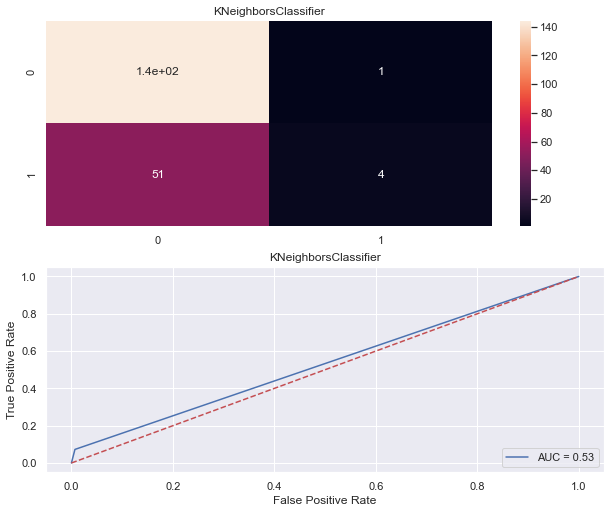




*-----------------------------* SVC *------------------------------*


SVC()


Accuracy_score =  72.5


Cross_Val_Score =  0.7529999999999999


roc_auc_score =  0.5


classification_report
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       145
           1       0.00      0.00      0.00        55

    accuracy                           0.73       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200



[[145   0]
 [ 55   0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


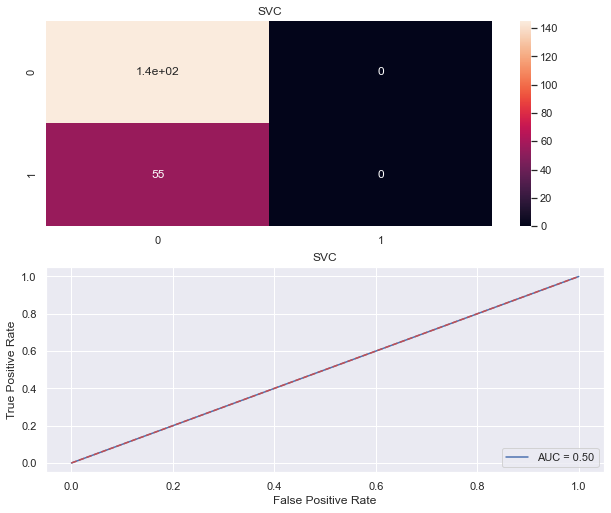




*-----------------------------* LogisticRegression *------------------------------*


LogisticRegression()


Accuracy_score =  72.5


Cross_Val_Score =  0.752


roc_auc_score =  0.5


classification_report
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       145
           1       0.00      0.00      0.00        55

    accuracy                           0.73       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200



[[145   0]
 [ 55   0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


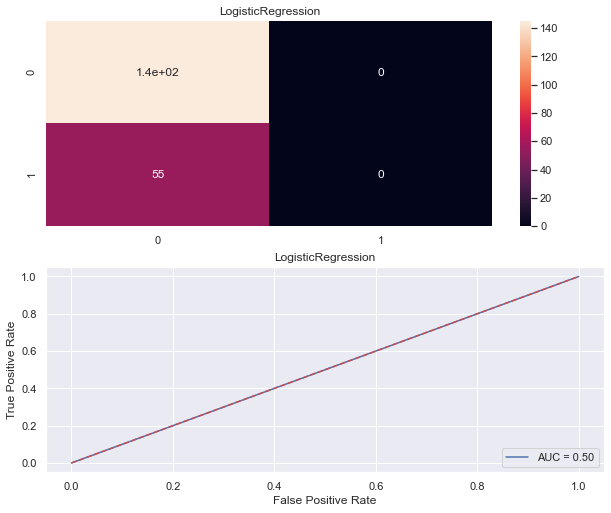




*-----------------------------* DecisionTreeClassifier *------------------------------*


DecisionTreeClassifier(random_state=6)


Accuracy_score =  77.5


Cross_Val_Score =  0.7780000000000001


roc_auc_score =  0.7150470219435736


classification_report
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       145
           1       0.59      0.58      0.59        55

    accuracy                           0.78       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.77      0.78      0.77       200



[[123  22]
 [ 23  32]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


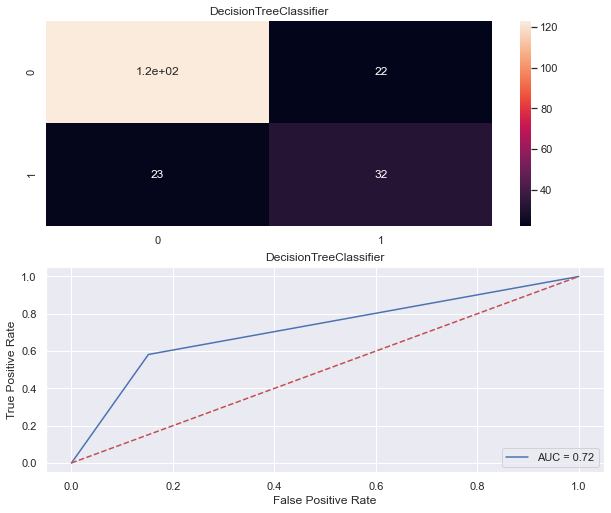




*-----------------------------* GaussianNB *------------------------------*


GaussianNB()


Accuracy_score =  65.5


Cross_Val_Score =  0.6749999999999999


roc_auc_score =  0.4686520376175548


classification_report
               precision    recall  f1-score   support

           0       0.71      0.88      0.79       145
           1       0.15      0.05      0.08        55

    accuracy                           0.66       200
   macro avg       0.43      0.47      0.43       200
weighted avg       0.56      0.66      0.59       200



[[128  17]
 [ 52   3]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


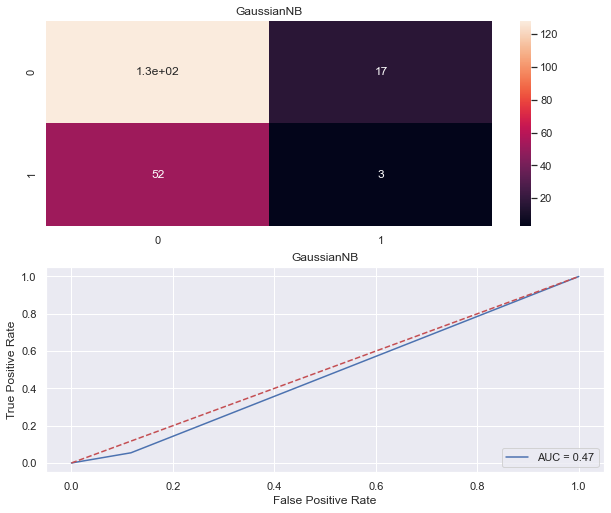

In [64]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS*100)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x_fraud, y_fraud, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print('\n\n')

In [65]:
Final_R = pd.DataFrame({'Classification Model': Model, 'Accuracy Score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
Final_R

,Classification Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,74.0,73.7,53.291536
1,SVC,72.5,75.3,50.000000
2,LogisticRegression,72.5,75.2,50.000000
3,DecisionTreeClassifier,77.5,77.8,71.504702
4,GaussianNB,65.5,67.5,46.865204


We will choose DecisionTreeClassifier as it is giving highest accuracy with good cross validation score and roc_auc curve

<h2>End of Machine learning Process</h2>


<h1>Now lets save our final model</h1>

In [66]:
import joblib
joblib.dump(RFR,'Automobile_claim.pkl')

['Automobile_claim.pkl']

In [67]:
joblib.dump(DT,'Automobile_fraud.pkl')

['Automobile_fraud.pkl']

<img src="https://knowledge.wharton.upenn.edu/wp-content/uploads/2020/05/Women-in-data-science.jpg">